In [1]:
## Load Libraries
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pickle
import os

In [2]:
## Load Dataset
#
dataset = pd.DataFrame()

for excel in os.listdir("Dataset"):
    if(excel.endswith('xlsx')):
        data = pd.read_excel("Dataset/"+ excel)
        dataset = dataset.append(data, ignore_index = True)

dataset.head()

,S. No.,Spec #,Spec Name,Para,Sub Section Heading,Submittal Type,Submittal Description,Target Date,Subcontractor
0,163,031000,CONCRETE FORMWORK,1.12-B,PERMITS AND WARRANTY,Warranty,Warranty : See Section 033000. Failures includ...,NaN,NaN
1,158,031000,CONCRETE FORMWORK,1.6-A,SUBMITTALS,Manufacturers Instructions,Required Submittals - Where the SUBMITTALS sec...,NaN,NaN
2,159,031000,CONCRETE FORMWORK,1.6-B,SUBMITTALS,Submittal Process,Submittal Process : See Section 033000.,NaN,NaN
3,160,031000,CONCRETE FORMWORK,1.6-C,SUBMITTALS,SER Submittal Review,SER Submittal Review : See Section 033000.,NaN,NaN
4,161,031000,CONCRETE FORMWORK,1.6-D,SUBMITTALS,Substitution Request,Substitution Request : See Section 033000.,NaN,NaN


In [3]:
## General Information
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7975 entries, 0 to 7974
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S. No.                 7975 non-null   int64  
 1   Spec #                 7975 non-null   object 
 2   Spec Name              7975 non-null   object 
 3   Para                   7970 non-null   object 
 4   Sub Section Heading    7975 non-null   object 
 5   Submittal Type         7975 non-null   object 
 6   Submittal Description  7975 non-null   object 
 7   Target Date            0 non-null      float64
 8   Subcontractor          0 non-null      float64
dtypes: float64(2), int64(1), object(6)
memory usage: 560.9+ KB


In [4]:
## Get All Feature Names
#
dataset.columns

Index(['S. No.', 'Spec #', 'Spec Name', 'Para', 'Sub Section Heading',
       'Submittal Type', 'Submittal Description', 'Target Date',
       'Subcontractor'],
      dtype='object')

In [5]:
## Remove Unwanted Features
#
dataset = dataset.drop(columns = dataset.columns[[0, 1, 2, 3, 4, 7, 8]])

In [6]:
## Interchange Features
#
dataset = dataset[["Submittal Description", "Submittal Type"]]
dataset.head()

,Submittal Description,Submittal Type
0,Warranty : See Section 033000. Failures includ...,Warranty
1,Required Submittals - Where the SUBMITTALS sec...,Manufacturers Instructions
2,Submittal Process : See Section 033000.,Submittal Process
3,SER Submittal Review : See Section 033000.,SER Submittal Review
4,Substitution Request : See Section 033000.,Substitution Request


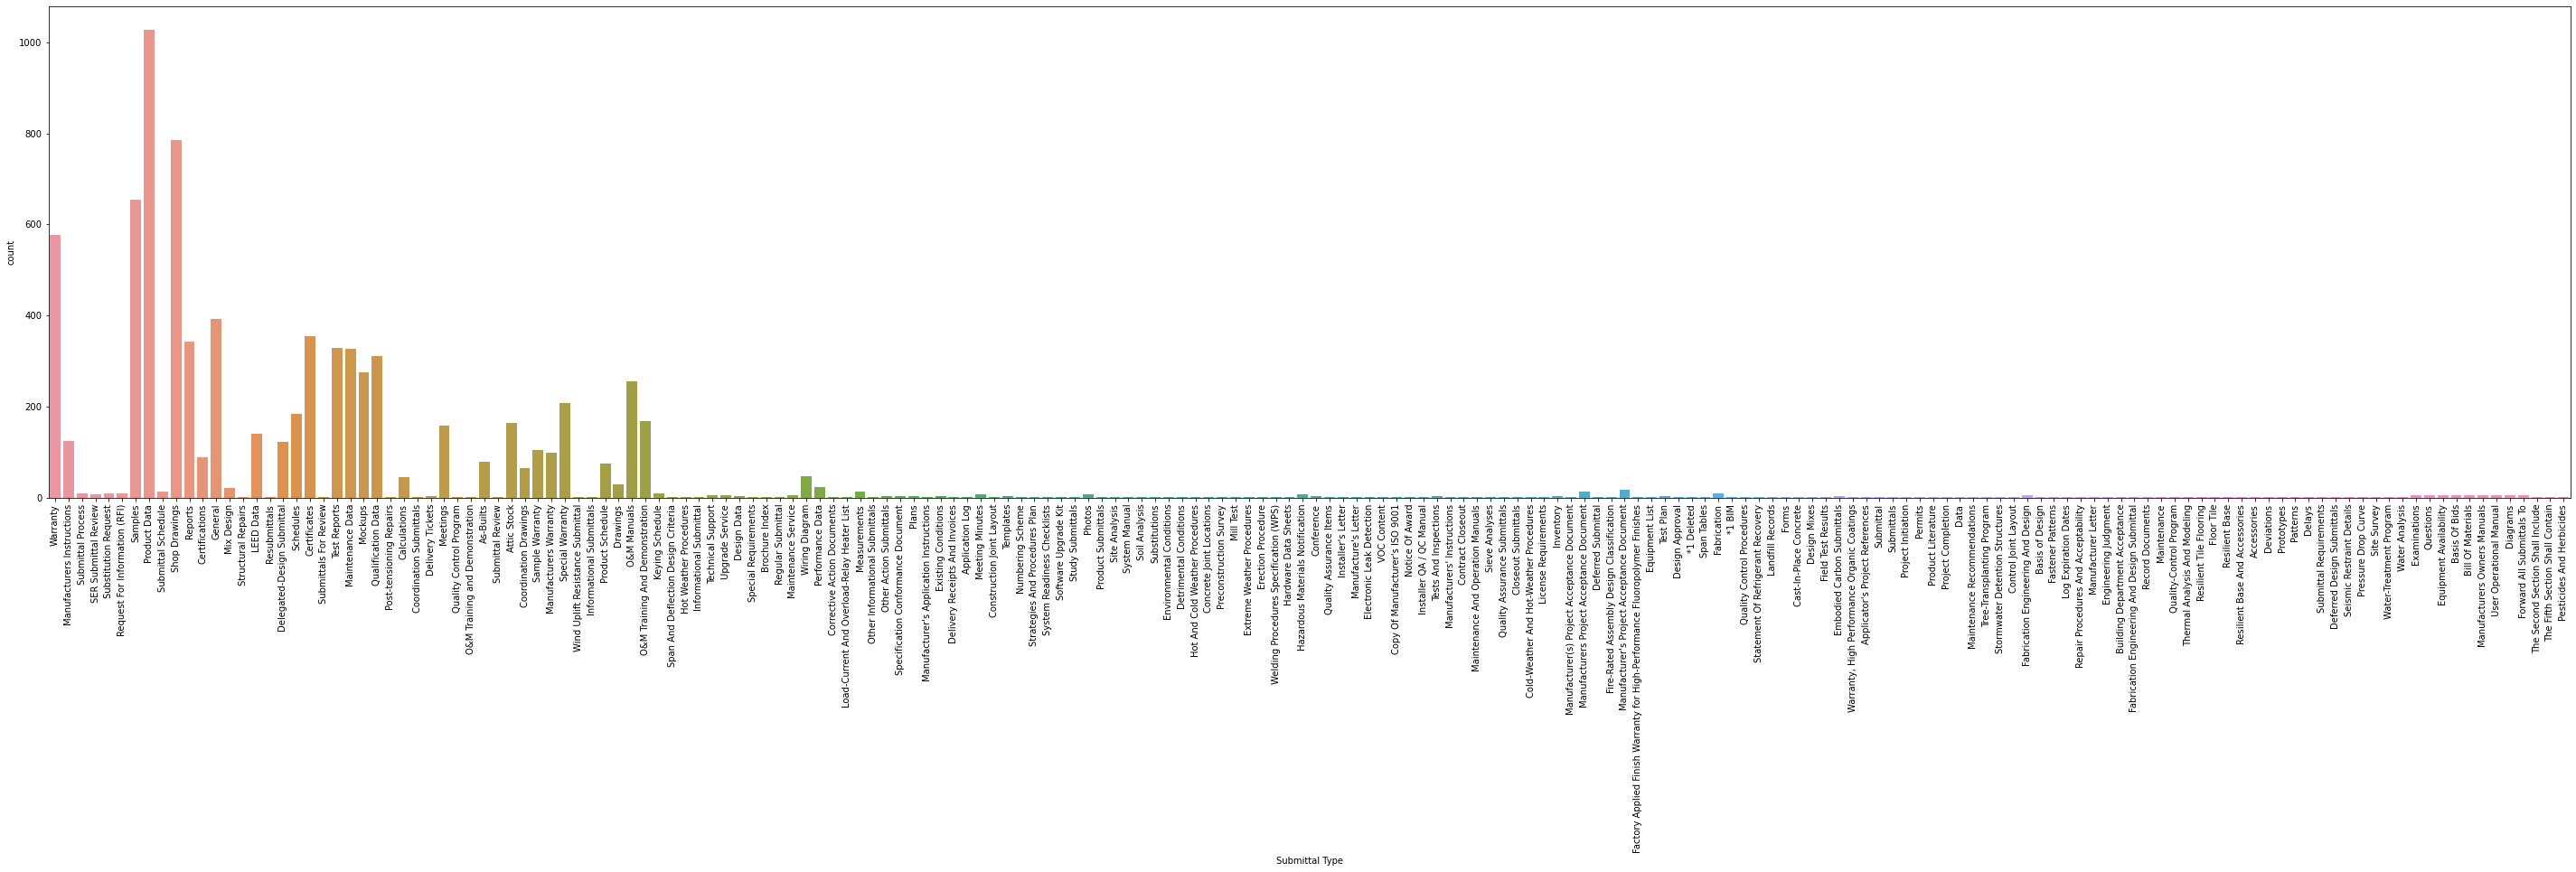

In [7]:
## Visualize Count of Submittal Type
#
plt.figure(figsize = (50,10))
sns.countplot(data = dataset,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

In [11]:
## Unique Pype Types
#
pd.DataFrame(dataset['Submittal Type'].unique()).to_excel("Pype Submittal Types.xlsx")

In [14]:
## Change Submittal Type
#
dataset['Submittal Type'] = dataset['Submittal Type'].replace('O&M Training and Demonstration', 'O&M Training And Demonstration')

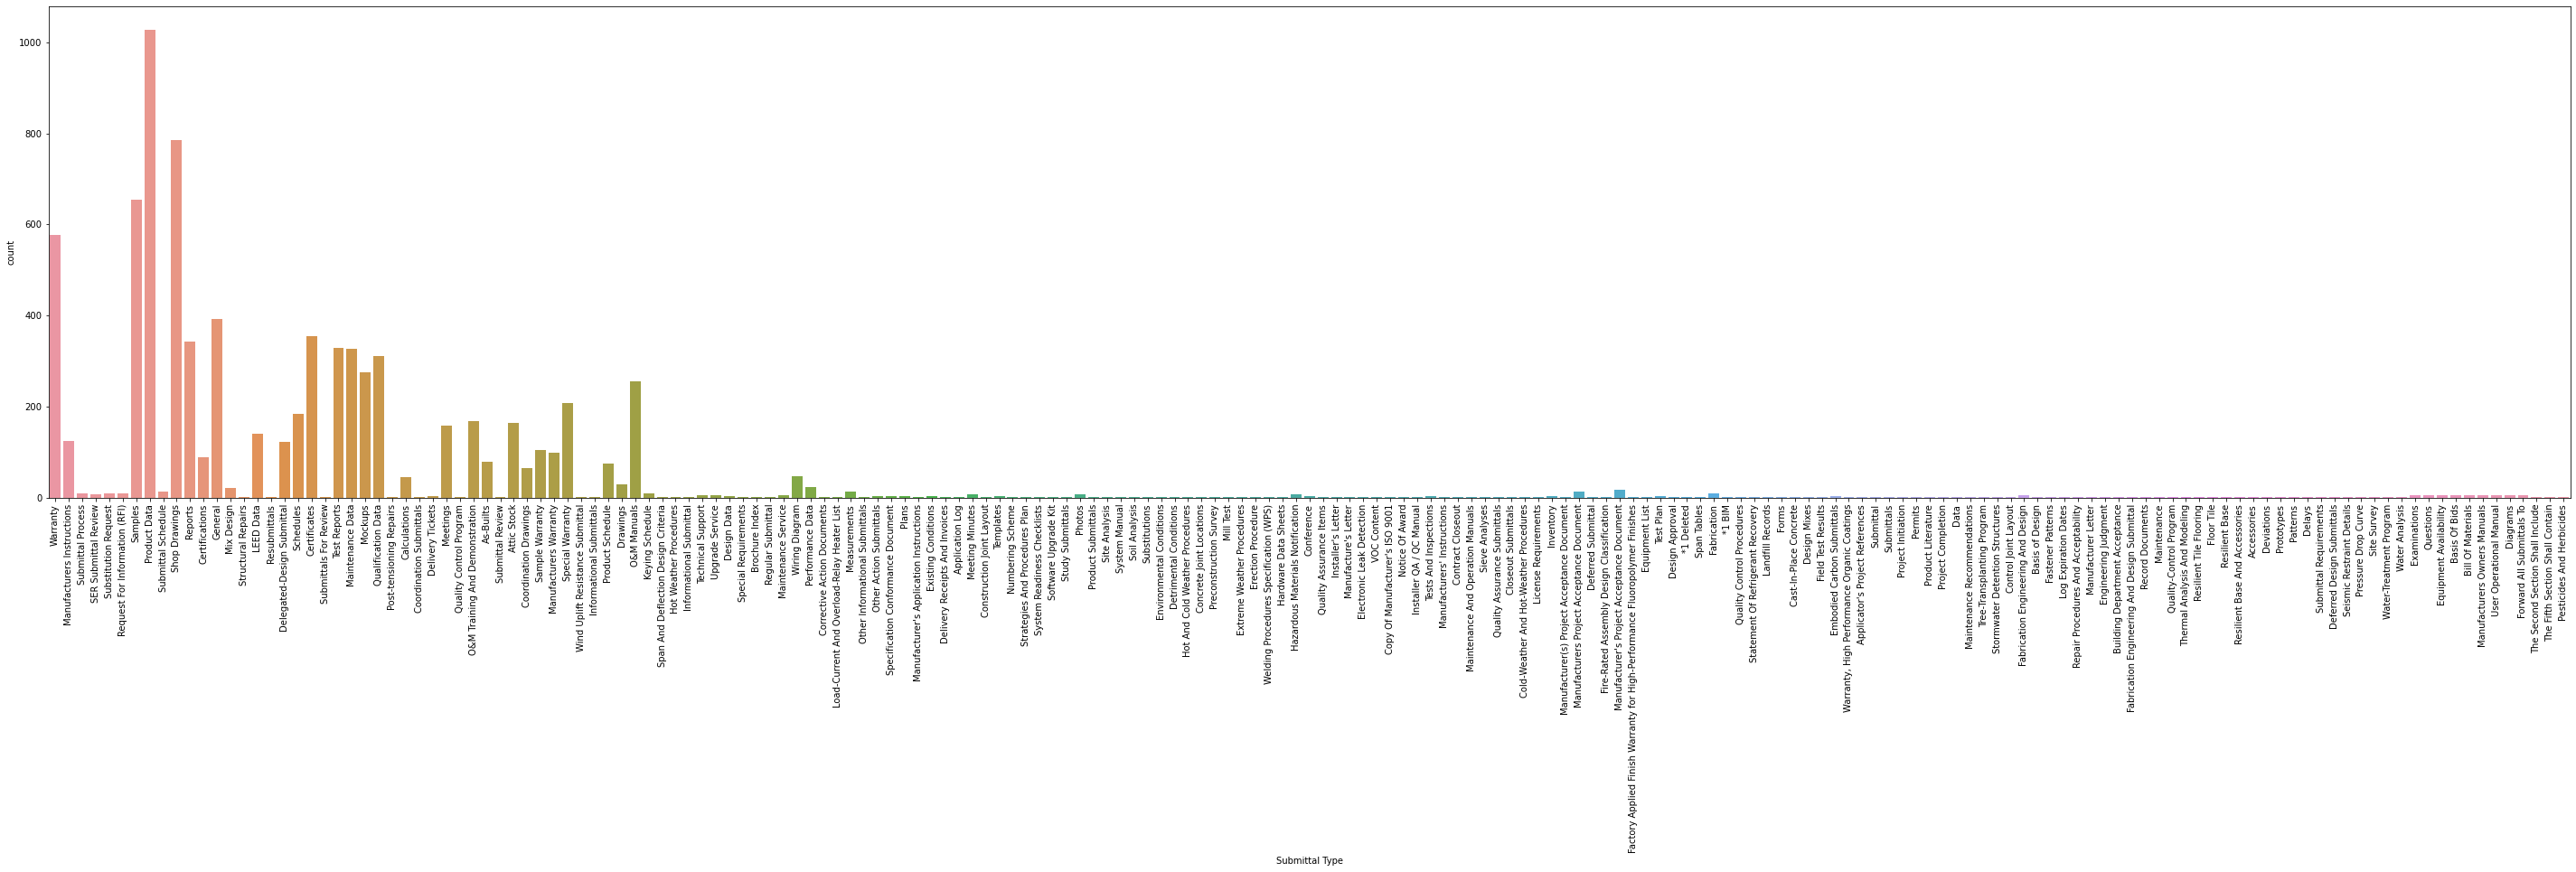

In [15]:
## Visualize Count of Submittal Type
#
plt.figure(figsize = (50,10))
sns.countplot(data = dataset,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

In [16]:
## Filter Dataset Features
#
# options = ['Attic Stock', 'Calculations', 'Certificates', 'Color', 'Chart Delivery', 'Leed Requirements', 'Maintenance Data' , 'Manufacturer/Installation Cert', \
#             'Mix Design', 'Mockups', 'MSDS', 'Owner Training', 'Product Data', 'Pre-Install Meeting Minutes', 'Procedures', 'Qualifications', 'Record Drawing', \
#             'Reports', 'Samples', 'Schedules', 'Shop Drawings', 'Test Data', 'Certifications']

options = ['Qualification Data', 'Schedules', 'Meetings', 'Product Data', 'Shop Drawings', 'Samples', 'Reports', \
    'Mockups', 'Certificates', 'Test Reports', 'Mix Design', 'General', 'As-Builts', 'O&M Training And Demonstration', \
    'Coordination Drawings', 'Calculations']

dataset = dataset[dataset['Submittal Type'].isin(options)]

## See the count
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 6 to 7974
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Submittal Description  5196 non-null   object
 1   Submittal Type         5196 non-null   object
dtypes: object(2)
memory usage: 121.8+ KB


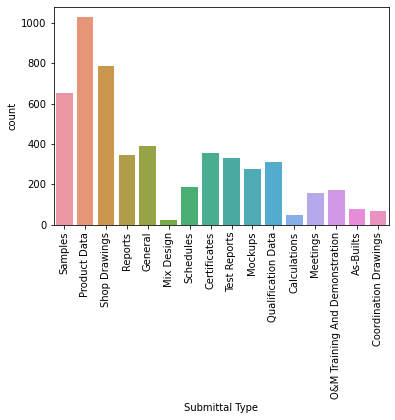

In [17]:
## Visualize count
#
sns.countplot(data = dataset,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

In [18]:
## Label Encoder
#
labelencoder = LabelEncoder()
dataset['Submittal Type'] = labelencoder.fit_transform(dataset['Submittal Type'])
dataset.head()

,Submittal Description,Submittal Type
6,Form tie holes shall bef illed as per approved...,12
8,Required Submittals - Where the SUBMITTALS sec...,9
10,Shop Draw ings: Submit for action shop draw in...,14
11,Product Data: Submit for action for each type ...,9
12,Mill Reports: Submit for record.,11


In [19]:
labals = labelencoder.classes_
labals = list(labals)
labals

['As-Builts',
 'Calculations',
 'Certificates',
 'Coordination Drawings',
 'General',
 'Meetings',
 'Mix Design',
 'Mockups',
 'O&M Training And Demonstration',
 'Product Data',
 'Qualification Data',
 'Reports',
 'Samples',
 'Schedules',
 'Shop Drawings',
 'Test Reports']

In [20]:
## Matrix Of Features - Independent and Dependent Features
#
X = dataset['Submittal Description']
Y = dataset['Submittal Type']

In [21]:
## Split Dataset
#
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [22]:
## Build Vocabulary
#
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train) 
X_test_tfidf = vectorizer.transform(X_test)

In [23]:
report_card = pd.DataFrame(columns = ['Model', 'Score', 'Precision', 'Recall'])

def training_model(model_name):
    global report_card


    ## Linear SVC Training
    #
    if(model_name == "Linear SVC"):
        classifier = LinearSVC()
        classifier.fit(X_train_tfidf, y_train)

    ## Random Forest Training
    #
    elif(model_name == "Random Forest"):
        classifier = RandomForestClassifier(n_estimators = 13, 
                                criterion = 'entropy',
                                random_state = 0)
        classifier.fit(X_train_tfidf, y_train)
    
    ## AdaBoost Training
    #
    elif(model_name == "AdaBoost"):
        classifier = AdaBoostClassifier()
        classifier.fit(X_train_tfidf, y_train)

    ## Stacking Training
    #
    elif(model_name == "Stack"):
        level0 = list()
        level0.append(('knn', KNeighborsClassifier()))
        level0.append(('bayes', GaussianNB()))

        classifier = StackingClassifier(estimators = level0)
        classifier.fit(X_train_tfidf.toarray(), y_train)   

    else:
        pass
    

    ## Prediction
    #
    if(model_name == "Stack"):
        predictions = classifier.predict(X_test_tfidf.toarray())
    else:
        predictions = classifier.predict(X_test_tfidf)

    ## Accuracy
    #
    score = metrics.accuracy_score(y_test, predictions) * 100

    ##
    #
    precision_score = metrics.precision_score(y_test, predictions, average = 'macro') * 100

    ##
    #
    recall_score = metrics.recall_score(y_test, predictions, average = 'macro') * 100

    ## Confusion Matrix
    #
    cm = metrics.confusion_matrix(y_test, predictions)

    report_card = report_card.append({'Model' : model_name, 'Score' : score, 'Precision' : precision_score, 'Recall' : recall_score}, 
                ignore_index = True)


    ## Export Results
    #
    # result_dataframe = pd.DataFrame()
    # result_dataframe['Test'] = X_test.tolist()
    # result_dataframe['Original'] = labelencoder.inverse_transform(y_test.to_list())
    # result_dataframe['Predicted'] = predictions.tolist()
    # result_dataframe['Predicted_Label'] = labelencoder.inverse_transform(predictions)

    # result_dataframe.to_excel("Result.xlsx")

    return classifier, cm
    



In [24]:
## Train Call Linear SVC
#
classifier, cm = training_model('Linear SVC')
report_card


,Model,Score,Precision,Recall
0,Linear SVC,94.765204,95.252921,93.687022


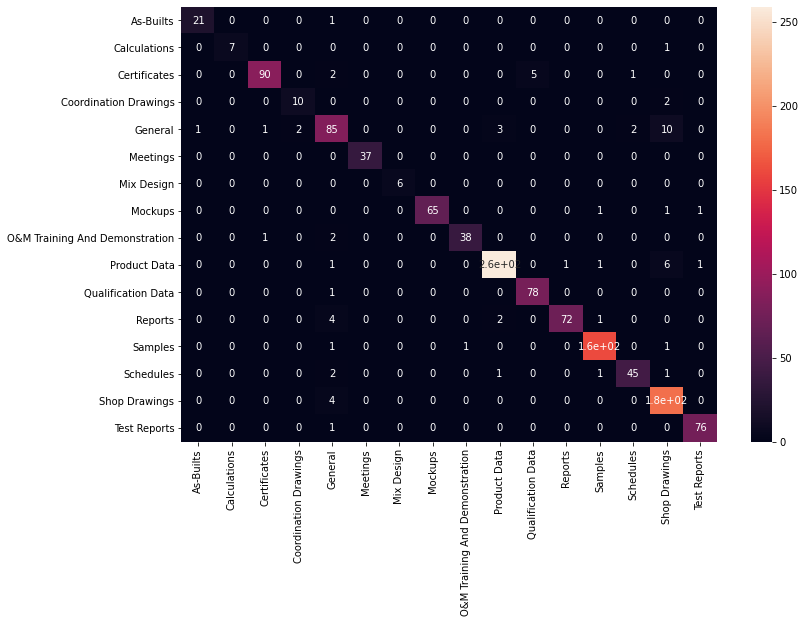

In [25]:
## Confusion Matrix For Linear SVC
#
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.heatmap(cm, xticklabels = labals, yticklabels = labals, annot = True)
plt.show()

In [26]:
## Train Call Random Forest
#
classifier, cm = training_model('Random Forest')
report_card

,Model,Score,Precision,Recall
0,Linear SVC,94.765204,95.252921,93.687022
1,Random Forest,91.377983,92.043586,84.530329


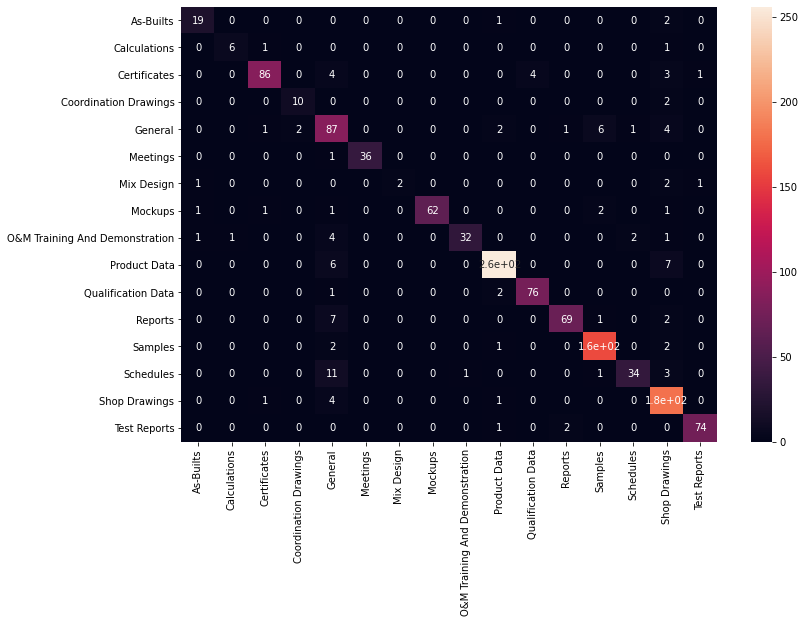

In [27]:
## Confusion Matrix
#
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.heatmap(cm, xticklabels = labals, yticklabels = labals, annot = True)
plt.show()

In [28]:
## Train Call AdaBoost
#
classifier, cm = training_model('AdaBoost')
report_card

C:\Users\KishanT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Score,Precision,Recall
0,Linear SVC,94.765204,95.252921,93.687022
1,Random Forest,91.377983,92.043586,84.530329
2,AdaBoost,42.263279,23.690734,29.098875


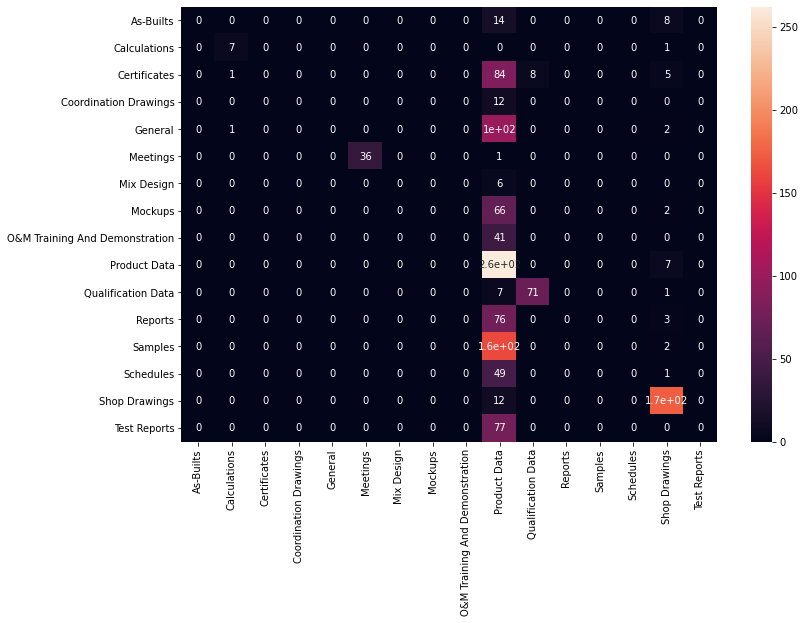

In [29]:
## Confusion Matrix
#
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.heatmap(cm, xticklabels = labals, yticklabels = labals, annot = True)
plt.show()

In [30]:
## Train Call Stacking
#
classifier, cm = training_model('Stack')
report_card

,Model,Score,Precision,Recall
0,Linear SVC,94.765204,95.252921,93.687022
1,Random Forest,91.377983,92.043586,84.530329
2,AdaBoost,42.263279,23.690734,29.098875
3,Stack,87.528868,89.769314,82.156316


In [31]:
classifier = LinearSVC()
classifier.fit(X_train_tfidf, y_train)

LinearSVC()

In [32]:
## Save Classifier, Vectorizer and Encoder
#
with open('type_classifier.pickle', 'wb+') as file:
    pickle.dump(classifier, file)

with open('vectorizer.pickle', 'wb+') as file:
    pickle.dump(vectorizer, file)

with open('label_encoder.pickle', 'wb+') as file:
    pickle.dump(labelencoder, file)

In [36]:
## Sample
#
test_sample = """All modifications or revisions to submittals and shop drawings must be
clouded, with an appropriate revision number clearly indicated. The
following shall automatically be considered cause for rejection of the
modification or revision whether or not the drawing has been approved
by the Design Professionals:

a. Failure to specifically cloud modifications
b. Unapproved revisions to previous submittals
c. Unapproved departure from Contract Submittals
"""

In [3]:
## Load Saved Model, Vectorizer and Encoder
#
with open("vectorizer.pickle", 'rb+') as file:
    vectorizer_saved = pickle.load(file)

with open("label_encoder.pickle", 'rb+') as file:
    encorder_saved = pickle.load(file)

with open("type_classifier.pickle", 'rb+') as file:
    classifier_saved = pickle.load(file)

In [38]:
## Result
#
result_code = classifier_saved.predict(vectorizer_saved.transform([test_sample]))
result_code

array([11])

In [39]:
## Result Convert
#
result = encorder_saved.inverse_transform(result_code)
result

array(['Shop Drawings'], dtype=object)

In [ ]:
!jupyter nbconvert --to script "type_classification.ipynb"

### PYPE and Model Comparision

In [4]:
## Load Saved Model, Vectorizer and Encoder
#
with open("vectorizer.pickle", 'rb+') as file:
    vectorizer_saved = pickle.load(file)

with open("label_encoder.pickle", 'rb+') as file:
    encorder_saved = pickle.load(file)

with open("type_classifier.pickle", 'rb+') as file:
    classifier_saved = pickle.load(file)

In [7]:
dataset = pd.read_excel("Pype and Model Compare Dataset/Takeda LA Pype.xlsx")
dataset.head()

,S. No.,Spec #,Spec Name,Para,Sub Section Heading,Submittal Type,Submittal Description,Target Date,Subcontractor
0,155,024119,SELECTIVE DEMOLITION,1.5-A,INFORMATIONAL SUBMITTALS,Qualification Data,Qualification Data : For refrigerant recovery ...,NaN,NaN
1,156,024119,SELECTIVE DEMOLITION,1.5-B,INFORMATIONAL SUBMITTALS,Engineering Survey,Engineering Survey : Submit engineering survey...,NaN,NaN
2,157,024119,SELECTIVE DEMOLITION,1.5-C,INFORMATIONAL SUBMITTALS,Measurements,"Proposed Protection Measures : Submit report, ...",NaN,NaN
3,158,024119,SELECTIVE DEMOLITION,1.5-D,INFORMATIONAL SUBMITTALS,Schedules,Schedule of Selective Demolition Activities : ...,NaN,NaN
4,159,024119,SELECTIVE DEMOLITION,1.5-E,INFORMATIONAL SUBMITTALS,Photos,Predemolition Photographs or Video : Show exis...,NaN,NaN


In [8]:
dataset = dataset.drop(columns = dataset.columns[[0, 1, 2, 3, 4, 7, 8]])

In [9]:
dataset = dataset[["Submittal Description", "Submittal Type"]]
dataset.head()

,Submittal Description,Submittal Type
0,Qualification Data : For refrigerant recovery ...,Qualification Data
1,Engineering Survey : Submit engineering survey...,Engineering Survey
2,"Proposed Protection Measures : Submit report, ...",Measurements
3,Schedule of Selective Demolition Activities : ...,Schedules
4,Predemolition Photographs or Video : Show exis...,Photos


In [10]:
description_vector = vectorizer_saved.transform(new_dataset['Submittal Description'])

In [11]:
predictions = classifier_saved.predict(description_vector)

In [14]:
dataset['Model Type'] = encorder_saved.inverse_transform(predictions)

In [16]:
metrics.accuracy_score(dataset['Submittal Type'], dataset['Model Type']) * 100

32.26890756302521

In [15]:
## Load Prepated Data Data
#

dataset.to_csv("Pype and Model Compare Dataset/Takeda Pype and Model.csv")